In [24]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
energy_xls_location = "Energy Indicators.xls"
world_bank_gdp_csv_location = "world_bank.csv"
scim_location = "scimagojr-3.xlsx"
#energy
energy = pd.read_excel(energy_xls_location, sheetname='Energy',header=None,skiprows=18,skip_footer=38)
energy.drop(energy.columns[[0,2]],axis=1,inplace=True) #drop header
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
for string in ['Energy Supply per Capita','Energy Supply']:
    energy[string].loc[energy[string].str.startswith('.', na=False)] = np.NaN
energy['Country'].replace({"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"},inplace=True)
energy['Country'] = energy['Country'].map(lambda x: x.rstrip('1234567890')) #remove numbers
energy['Country'] = energy['Country'].str.replace(r"\(.*\)","") #remove parantheses
energy['Country'] = energy['Country'].str.strip() #remove white space
energy['Energy Supply'] = energy['Energy Supply']*1000000 #petajoule to gigajoules
#energy

#GDP
GDP = pd.read_csv(world_bank_gdp_csv_location, skiprows=4)
GDP = GDP.rename(columns={'Country Name': 'Country'})
GDP['Country'] = GDP['Country'].replace({"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"})
#GDP

#ScimEn
ScimEn = pd.read_excel(scim_location)
merge1 = energy.merge(GDP,on='Country',how='inner').merge(ScimEn,on='Country',how='inner')
merge2 = merge1.set_index('Country')
final = merge2.drop(['Country Code','Indicator Name', 'Indicator Code'], axis=1)
columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 
                            'Self-citations', 'Citations per document', 
                            'H index', 'Energy Supply', 'Energy Supply per Capita', 
                            '% Renewable', '2006', '2007', '2008', '2009', '2010', 
                            '2011', '2012', '2013', '2014', '2015']
final = final[columns]
final = final.sort_values(by='Rank')
#ScimEn
Top15 = final.head(15)
Top15

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,33195000000,26,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,10597000000,166,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [2]:
innerJoin = ScimEn.merge(energy).merge(GDP, left_on='Country', right_on='Country')
outerJoin = ScimEn.merge(energy, how='outer').merge(GDP, how='outer', left_on='Country', right_on='Country')
print(str(len(outerJoin)-len(innerJoin)) + " lost cleaning")

156 lost cleaning


In [27]:
top15 = Top15.copy()
average = top15[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].mean(axis=1)
average.sort_values(axis=0,ascending=False,inplace=True)
avgGdp = average.rename('avgGDP')
avgGdp

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

In [28]:
top15 = Top15.copy()
sixth = avgGdp.iloc[5]
name = avgGdp[avgGdp==sixth].index[0]
row = top15.loc[name]
row['2015'] - row['2006']


246702696075.3999

In [29]:
top15 = Top15.copy()
mean = top15[['Energy Supply per Capita']].mean(axis=0)
float(mean.values[0])

157.6

In [30]:
top15 = Top15.copy()
top = top15.nlargest(1,columns='% Renewable')
(top.index[0] , top['% Renewable'].values[0])


('Brazil', 69.648030000000006)

In [31]:
top15 = Top15.copy()
top15['Ratio'] = top15['Self-citations']/top15['Citations']
top = top15.nlargest(1,columns='Ratio')
(top.index[0], top['Ratio'].values[0])

('China', 0.68931261793894216)

In [32]:
Top15['PopEstimate'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']
top15 = Top15.copy()
top = top15['PopEstimate'].astype(float)
top.nlargest(3).index[2]

'United States'

In [35]:
Top15['Citable documents per person'] = Top15['Citable documents']/Top15['PopEstimate']
top15 = Top15.copy()
top15 = top15.reset_index()
correlation = pd.DataFrame([top15['Citable documents per person'], top15['Energy Supply per Capita']]).T.corr()
correlation['Energy Supply per Capita']['Citable documents per person']

0.79400104354429435

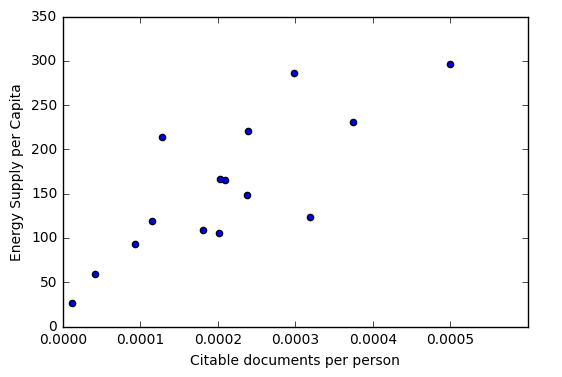

In [40]:
import matplotlib as plt
%matplotlib inline
Top15.plot(x='Citable documents per person', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

In [41]:
top15 = Top15.copy()
median = top15['% Renewable'].median()
top15['HighRenew'] = 0
var = top15[top15['% Renewable'] >= median]
top15.set_value(var.index, 'HighRenew', 1)
top15.sort_values(by='Rank',ascending=False)['HighRenew']

Country
Brazil                1
Australia             0
Iran                  0
Spain                 1
Italy                 1
South Korea           0
France                1
India                 0
Germany               1
Canada                1
Russian Federation    1
United Kingdom        0
Japan                 0
United States         0
China                 1
Name: HighRenew, dtype: int64

In [45]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

top15 = Top15.copy()
top15['Continent'] = top15.index
for index, value in top15['Continent'].iteritems():
    top15.loc[index, 'Continent'] = ContinentDict[value]
result = ( top15.set_index('Continent').groupby(level=0)['PopEstimate']
        .agg({'size': len, 'sum': np.sum, 'mean': np.average, 'std': np.std}) )
result

,sum,size,mean,std
Continent,,,,
Asia,2.898666e+09,5.0,5.797333e+08,6.790979e+08
Australia,2.331602e+07,1.0,2.331602e+07,NaN
Europe,4.579297e+08,6.0,7.632161e+07,3.464767e+07
North America,3.528552e+08,2.0,1.764276e+08,1.996696e+08
South America,2.059153e+08,1.0,2.059153e+08,NaN


In [46]:
top15 = Top15.copy()
cut = pd.cut(top15["% Renewable"], 5,labels=False) 
grouped = cut.groupby([ContinentDict,cut])
count = grouped.count()
count

               % Renewable
Asia           0              4
               1              1
Australia      0              1
Europe         0              1
               1              3
               2              2
North America  0              1
               4              1
South America  4              1
Name: % Renewable, dtype: int64

In [53]:
import locale
top15 = Top15.copy()
top15['PopEstimateString'] = top15['PopEstimate'].astype(str)
top15['PopEstimateString'] = top15['PopEstimate'].apply(lambda x: "{:,}".format(x))
top15['PopEstimateString'].rename('PopEst').sort_values(ascending=True)

Country
India                 1,276,730,769.2307692
China                 1,367,645,161.2903225
Japan                  127,409,395.97315437
Russian Federation            143,500,000.0
Brazil                 205,915,254.23728815
Australia              23,316,017.316017315
United States          317,615,384.61538464
Canada                  35,239,864.86486486
Spain                    46,443,396.2264151
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
France                  63,837,349.39759036
United Kingdom         63,870,967.741935484
Iran                    77,075,630.25210084
Germany                 80,369,696.96969697
Name: PopEst, dtype: object

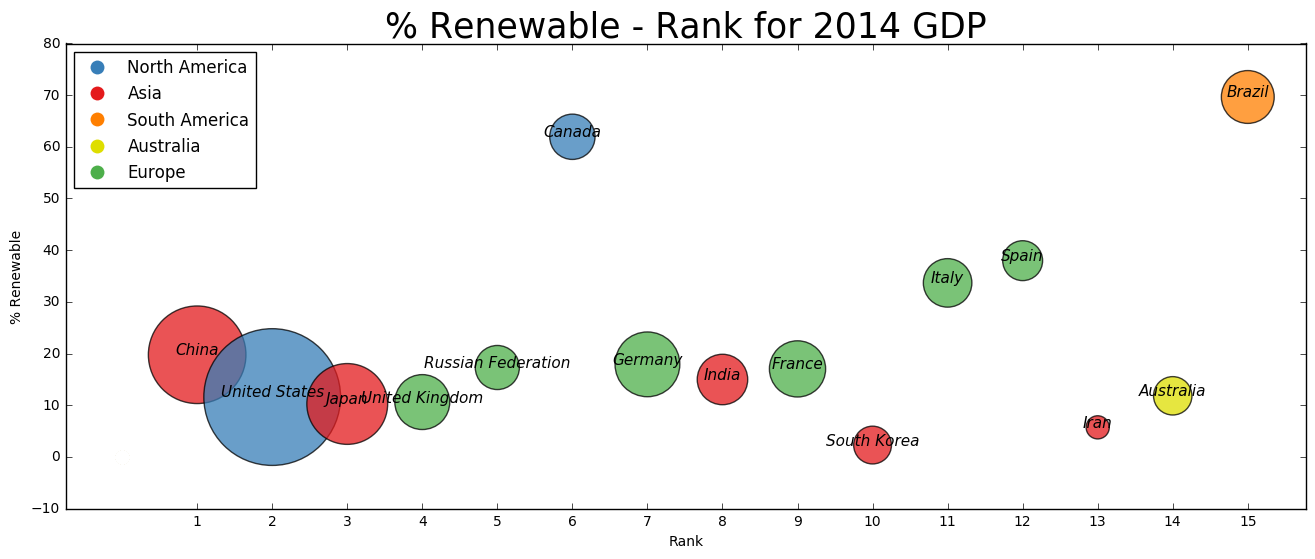

In [294]:
import matplotlib.pyplot as plt
top15 = Top15.copy()
top15['Color']=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00']

ax = top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                c=top15['Color'], 
                xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);
for i, txt in enumerate(top15.index):
    ax.annotate(txt, [top15['Rank'][i], Top15['% Renewable'][i]], ha='center',fontsize=11,style='italic')

ax.set_title('% Renewable - Rank for 2014 GDP',fontsize=25)

color_set = set(color)
for i in color_set:
    ax.plot(0, 'o',markersize=10,markeredgecolor='none',label=top15[top15['Color'] == i]['Continent'][0],color=i)
ax.plot(0,0, 'o',markersize=11,color='white',markeredgecolor='none')
ax.legend(loc='upper left',numpoints=1)